In [26]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [18]:
dir_data = 'data'

In [19]:
img_ext = ['jpeg', 'jpg', 'bmp', 'png']

In [23]:
os.listdir('data')

['cats', 'dogs']

In [24]:
for classe in os.listdir(dir_data):
    for img in os.listdir(os.path.join(dir_data, classe)):
        img_path = os.path.join(dir_data, classe, img)
        try:
            foto = cv2.imread(img_path)
            tipo_img = imghdr.what(img_path)
            if tipo_img not in img_ext:
                print('Imagem não está na lista {}'.format(img_path))
                os.remove(img_path)
        except Exception as e:
            print('Problema com a imagem {}'.format(img_path))
            os.remove(img_path)

Imagem não está na lista data\cats\1200px-Cat_November_2010-1a.jpg
Imagem não está na lista data\cats\800px-Juvenile_Ragdoll.jpg
Imagem não está na lista data\cats\Abyssinian-sorrel.jpg
Imagem não está na lista data\cats\cat-g9rdx9uk2425fip2.jpg
Imagem não está na lista data\cats\cat-landing-hero-lg.jpg
Imagem não está na lista data\cats\Himalayan-chocolate-point.jpg
Imagem não está na lista data\cats\vector.svg
Imagem não está na lista data\cats\vector10.svg
Imagem não está na lista data\cats\vector11.svg
Imagem não está na lista data\cats\vector12.svg
Imagem não está na lista data\cats\vector13.svg
Imagem não está na lista data\cats\vector14.svg
Imagem não está na lista data\cats\vector15.svg
Imagem não está na lista data\cats\vector16.svg
Imagem não está na lista data\cats\vector17.svg
Imagem não está na lista data\cats\vector18.svg
Imagem não está na lista data\cats\vector19.svg
Imagem não está na lista data\cats\vector2.svg
Imagem não está na lista data\cats\vector3.svg
Imagem não

In [27]:
tf.keras.utils.image_dataset_from_directory??

In [28]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 183 files belonging to 2 classes.


In [29]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
dt_iter = data.as_numpy_iterator()

In [37]:
batch = dt_iter.next()

In [32]:
batch

(array([[[[130.75     ,  94.703125 ,  36.71875  ],
          [132.97656  ,  94.00781  ,  37.039062 ],
          [129.9961   ,  93.99609  ,  35.996094 ],
          ...,
          [208.01172  , 213.01172  , 216.01172  ],
          [206.02734  , 211.01562  , 214.01562  ],
          [202.2461   , 210.2461   , 212.2461   ]],
 
         [[128.92969  ,  89.953125 ,  34.953125 ],
          [127.46484  ,  91.75     ,  34.226562 ],
          [127.94141  ,  91.94141  ,  33.941406 ],
          ...,
          [211.45312  , 213.20312  , 216.95312  ],
          [203.25     , 211.25     , 213.25     ],
          [202.       , 210.       , 212.       ]],
 
         [[126.05859  ,  89.05859  ,  34.058594 ],
          [126.55859  ,  89.63281  ,  32.097656 ],
          [124.61328  ,  87.76953  ,  32.57422  ],
          ...,
          [205.21484  , 212.98047  , 215.0586   ],
          [202.65234  , 210.65234  , 212.65234  ],
          [201.3086   , 209.3086   , 211.3086   ]],
 
         ...,
 
         [[1

In [33]:
batch[1]

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [34]:
len(batch)

2

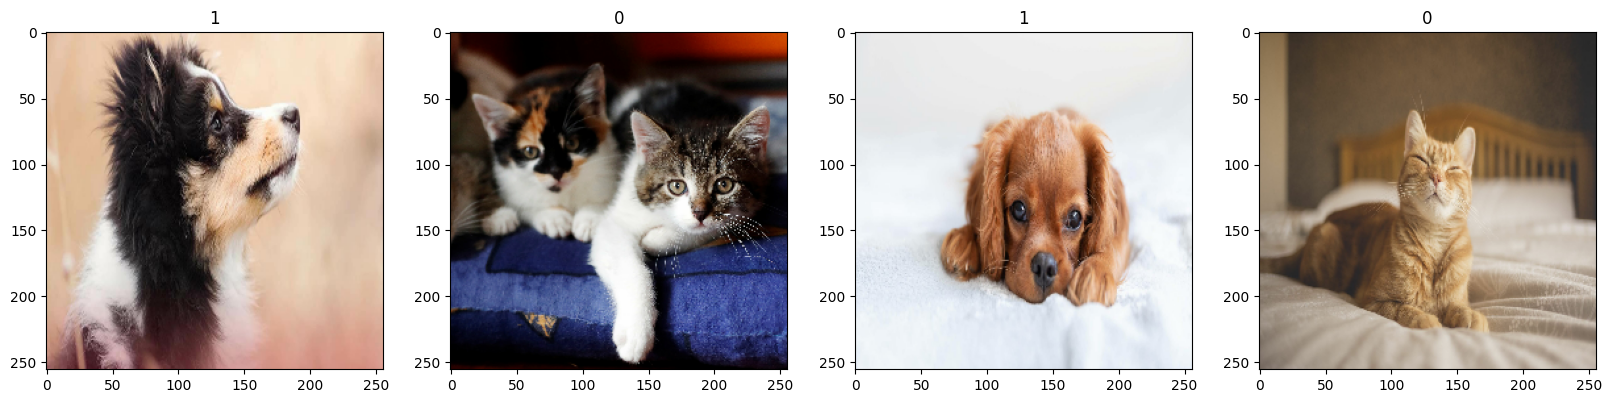

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for i, img in enumerate(batch[0][:4]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(batch[1][i])

In [41]:
data = data.map(lambda x, y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [42]:
data.as_numpy_iterator().next()[0].min(), data.as_numpy_iterator().next()[0].max()

(0.0, 1.0)

In [43]:
len(data)

6

In [44]:
6*0.7, 6*0.2, 6*0.1

(4.199999999999999, 1.2000000000000002, 0.6000000000000001)

In [50]:
train_set = int(len(data)*0.7)
val_set = int(len(data)*0.2)
test_set = int(len(data)*0.1)+1

In [51]:
train_set, test_set, val_set 

(4, 1, 1)

In [53]:
train = data.take(train_set)
val = data.skip(train_set).take(val_set)
test = data.skip(train_set+val_set).take(test_set)

In [59]:
len(train)

4

In [91]:
model = Sequential() # Criando o modelo de rede neural convolucional

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 16)        9232      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 30, 30, 16)     

In [93]:
logs = 'logs'

In [94]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs)

In [96]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 21s 3s/step - loss: 1.4600 - accuracy: 0.5625 - val_loss: 0.7173 - val_accuracy: 0.5938
Epoch 2/20
4/4 [==============================] - 15s 3s/step - loss: 0.7608 - accuracy: 0.4297 - val_loss: 0.6762 - val_accuracy: 0.6562
Epoch 3/20
4/4 [==============================] - 15s 3s/step - loss: 0.6824 - accuracy: 0.5312 - val_loss: 0.6668 - val_accuracy: 0.6875
Epoch 4/20
4/4 [==============================] - 16s 3s/step - loss: 0.6460 - accuracy: 0.6875 - val_loss: 0.6731 - val_accuracy: 0.5312
Epoch 5/20
4/4 [==============================] - 16s 4s/step - loss: 0.6298 - accuracy: 0.6484 - val_loss: 0.5950 - val_accuracy: 0.6875
Epoch 6/20
4/4 [==============================] - 16s 4s/step - loss: 0.5408 - accuracy: 0.8047 - val_loss: 0.5471 - val_accuracy: 0.6562
Epoch 7/20
4/4 [==============================] - 15s 3s/step - loss: 0.5047 - accuracy: 0.7656 - val_loss: 0.4467 - val_accuracy: 0.7500
Epoch 8/20
4/4 [==================

Text(0.5, 0, 'epochs')

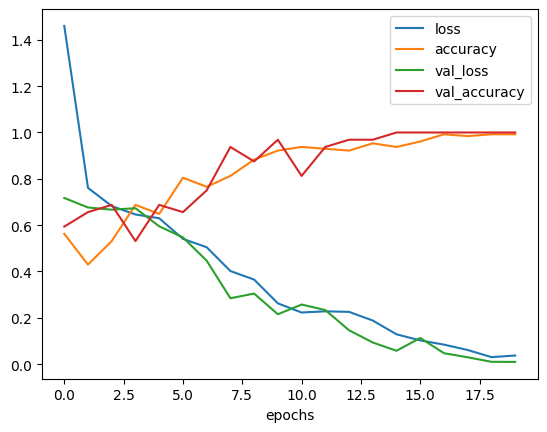

In [98]:
import pandas as pd

pd.DataFrame(history.history).plot()
plt.xlabel("epochs")

In [108]:
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

In [109]:
acc = BinaryAccuracy()
pre = Precision()
rec = Recall()

In [110]:
for batch in test.as_numpy_iterator():
    x, y = batch
    preds = model.predict(x)
    pre.update_state(y, preds)
    rec.update_state(y, preds)
    acc.update_state(y, preds)

1/1 [==============================] - 0s 299ms/step


In [111]:
print(f'{pre.result()}, {rec.result()}, {acc.result()}')

1.0, 1.0, 1.0


In [124]:
def classification(pred):
    if pred > 0.5:
        print('É um cachorro!')
    else:
        print('É um gato!')

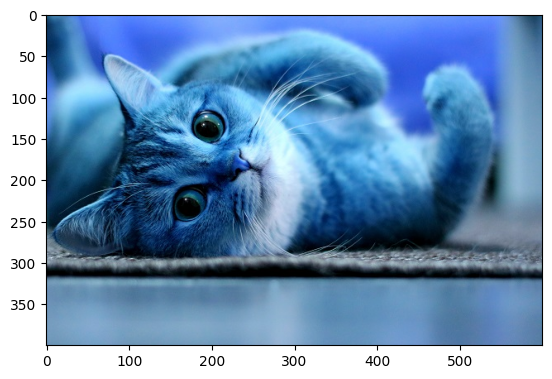

In [117]:
nv_img = cv2.imread('cat_test.jpg')
plt.imshow(nv_img)
plt.show()

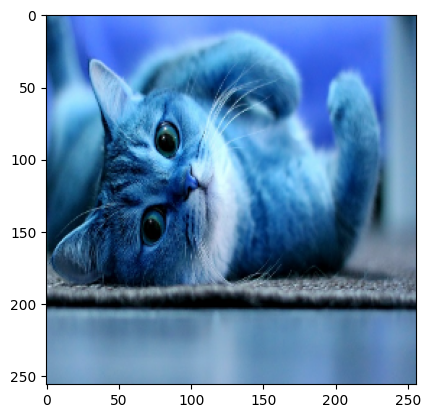

In [120]:
resize = tf.image.resize(nv_img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [155]:
pred = model.predict(np.expand_dims(resize/255, 0))
pred

1/1 [==============================] - 0s 71ms/step


array([[0.31288663]], dtype=float32)

In [156]:
classification(pred)

É um gato!


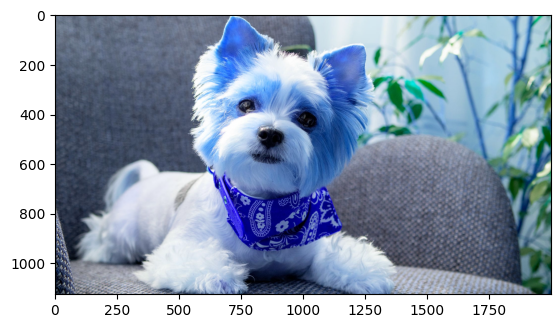

In [151]:
nv_img2 = cv2.imread('dog_y.jpg')
plt.imshow(nv_img2)
plt.show()

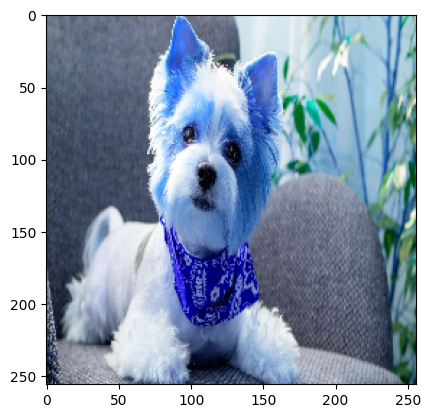

In [152]:
resize2 = tf.image.resize(nv_img2, (256, 256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [153]:
pred2 = model.predict(np.expand_dims(resize2/255, 0))
pred2

1/1 [==============================] - 0s 110ms/step


array([[0.9997764]], dtype=float32)

In [154]:
classification(pred2)

É um cachorro!


In [157]:
model.save(os.path.join('modelos', 'dogs_cats_classifier.h5'))